In [93]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint

In [109]:
# Read in csv data
attrition_df = pd.read_csv("data/IBM_attrition_data.csv")
attrition_df 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [95]:
# Set X and y values
X = attrition_df.drop(['Attrition'], axis=1)
X = pd.get_dummies(X)
y = attrition_df['Attrition']

X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,1,0,0,1,0,1,1,0


In [112]:
X_cleaned = X.drop(["OverTime_No", "Gender_Male"], axis=1)
X_cleaned

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,1,0,0,0,1,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,0,0,0,1,0,1,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,1,0,0,0,0,0,1,0,1,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,1,0,0,1,0,1,0


In [113]:
# Train test split data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y,random_state=0)

print(X_cleaned.shape, y.shape)

(1470, 53) (1470,)


In [114]:
# Create RFE class 
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=34)

# Create model 
model = GradientBoostingClassifier()

In [115]:
# Transform the data using pipeline
pipe = Pipeline([("Feature Selection", rfe), ("Model", model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.861 (0.022)


In [116]:
# Fit pipeline to dataset
pipe.fit(X_train, y_train)


Pipeline(steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=34)),
                ('Model', GradientBoostingClassifier())])

In [117]:
# Check support of the ranking
rfe.support_

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False,  True, False,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
        True,  True,  True, False, False,  True, False,  True])

In [119]:
# Create dataframe with support ranking array
feature_rank = pd.DataFrame(rfe.support_, index=X_cleaned.columns, columns=['Rank'])
feature_rank

,Rank
Age,True
DailyRate,True
DistanceFromHome,True
Education,False
EmployeeCount,False
EmployeeNumber,True
EnvironmentSatisfaction,True
HourlyRate,True
JobInvolvement,True
JobLevel,True


In [120]:
# Check Relative Rankings
rf_df = pd.DataFrame(rfe.ranking_,index=X_cleaned.columns,columns=["Rank"]).sort_values(by="Rank",ascending=True)
rf_df

,Rank
Age,1
WorkLifeBalance,1
YearsAtCompany,1
YearsInCurrentRole,1
YearsSinceLastPromotion,1
YearsWithCurrManager,1
BusinessTravel_Travel_Frequently,1
Department_Research & Development,1
TrainingTimesLastYear,1
EducationField_Human Resources,1


In [54]:
# Predictions 
rfe.predict(X)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)


In [121]:
# Recurssive feature eliminator 
rfecv = RFECV(estimator=GradientBoostingClassifier())

In [122]:
# Specify pipeline and CV for Recurssive Features 
pipeline = Pipeline([("Feature Selection", rfecv), ("Model", model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.860 (0.025)


In [123]:
# Fit optimal # of features pipeline to model 
pipeline.fit(X_train, y_train)


Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [125]:
# Recurssive feature rankings and support 
rfecv.support_

feature_ranl = pd.DataFrame(rfecv.support_, index=X_cleaned.columns, columns=['Rank'])
feature_rank

,Rank
Age,True
DailyRate,True
DistanceFromHome,True
Education,False
EmployeeCount,False
EmployeeNumber,True
EnvironmentSatisfaction,True
HourlyRate,True
JobInvolvement,True
JobLevel,True


In [126]:
# Recurssive relative ranking 
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X_cleaned.columns,columns=["Rank"]).sort_values(by="Rank",ascending=True)
rfecv_df

,Rank
Age,1
YearsWithCurrManager,1
YearsAtCompany,1
TotalWorkingYears,1
StockOptionLevel,1
NumCompaniesWorked,1
MonthlyRate,1
MonthlyIncome,1
OverTime_Yes,1
JobInvolvement,1


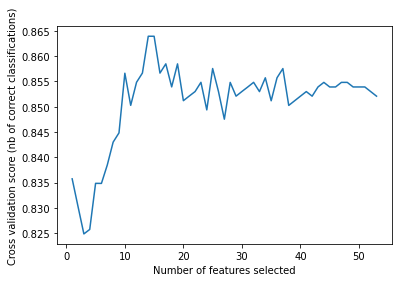

In [128]:
# plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show() 

Using DecisionTreeClassifier